# Picking a region with the highest profit margin

We have data on the oil reserves in 3 regions (1 dataset for each region). We will train a Linear Regression model for each of them to predict the volume it will contain, calculate revenues for each region and decide, using our findings, the region with the highest profit margin 

# Table of Contents
- [General Information](#step1)
- [Splitting data and model training](#step2)
- [Break-Even volume for each well](#step3)
- [Profit from selected wells and model predictions](#step4)
- [Risks and profit for each region](#step5)
- [Conclusion](#step6)

## General Information <a name="step1"></a>

Let us first import the libraries needed

In [1]:
import pandas as pd #for dealing with dataframes
from sklearn.linear_model import LinearRegression #to deal with Linear Regression Models
from sklearn.model_selection import train_test_split #to be able to split datasets
from sklearn.metrics import mean_squared_error #to be able to calculate model's mean squared error
from scipy import stats as st #for statistic functions
import numpy as np #for number arrays
import matplotlib.pyplot as plt #for graphical representation
import seaborn as sns #for graphical representation

Now we can use the pd.read_csv() method to save the datasets as dataframes 

In [2]:
data_0=pd.read_csv('/datasets/geo_data_0.csv')
#reads the geo_data_0 set and saves it as a dataframe called data_0
data_1=pd.read_csv('/datasets/geo_data_1.csv')
#reads the geo_data_1 set and saves it as a dataframe called data_1
data_2=pd.read_csv('/datasets/geo_data_2.csv')
#reads the geo_data_2 set and saves it as a dataframe called data_2

Let us now look through the data in each dataset

In [3]:
data_0.head() #first 5 rows of data_0

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
data_0.info() #general info on data_0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [6]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [8]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


After looking through the datasets, we find no missing values; always a welcome sight. Our target will always be the 'product' column, and the rest of the columns will be the features. 

## Splitting data and model training <a name="step2"></a>

We can first of all create a function that takes 4 data splits as arguments (i.e training features and target, validation features and target), trains a Linear Regression model and returns the root mean squared error and the predictions. Then, for each dataset, we can do the actual data splitting and call our defined function to train a model. First, the function:

In [9]:
def lr_model(f_train, f_valid, t_train, t_valid):
    #creates a function that takes 4 data splits as arguments
    lr = LinearRegression().fit(f_train, t_train)
    #trains a linear regression model using the training splits
    t_pred = lr.predict(f_valid)
    #uses the trained model to get predictions for the validation features
    rmse=(mean_squared_error(t_valid, t_pred))**0.5
    #calculates the root mean squared error between the validation target and predictions
    return rmse, t_pred #returns the root mean squared error and the predictions

Now we can do the splitting (75% training, 25% validation). The id column in each set is unique for each reserve, so it won't really help the learning process so we will drop it. After we will train models for them by passing the 4 splits as arguments to our lr_model function. We can get the root mean squared error and the mean of the predictions. For region 0:

In [10]:
features0=data_0.drop(['id', 'product'], axis=1)
#defines features by dropping the id and product columns
target0=data_0['product'] #target will be the product column
f_train0, f_valid0, t_train0, t_valid0 = train_test_split(features0, target0, test_size=0.25, \
                                                          random_state=12345)
#splits the features and targets, 75% for training and 25% for validation
rmse0, pred0 = lr_model(f_train0, f_valid0, t_train0, t_valid0)
#passes the 4 splits to our lr_model function to get the rmse and the predictions
print('RMSE:', rmse0, '; Average predicted volume:', pred0.mean())
#prints out the rmse and the mean of the predictions 

RMSE: 37.5794217150813 ; Average predicted volume: 92.59256778438038


For region 0, the RMSE is 37.58 and the mean prediction is 92.59.
Onto region 1:

In [11]:
features1=data_1.drop(['id', 'product'], axis=1)
target1=data_1['product']
f_train1, f_valid1, t_train1, t_valid1 = train_test_split(features1, target1, test_size=0.25, \
                                                          random_state=12345)
rmse1, pred1 = lr_model(f_train1, f_valid1, t_train1, t_valid1)
print('RMSE:', rmse1, '; Average predicted volume:', pred1.mean())

RMSE: 0.893099286775616 ; Average predicted volume: 68.728546895446


For region 1, the RMSE is 0.89 and the mean prediction is 68.73. Onto region 2:

In [12]:
features2=data_2.drop(['id', 'product'], axis=1)
target2=data_2['product']
f_train2, f_valid2, t_train2, t_valid2 = train_test_split(features2, target2, test_size=0.25, \
                                                          random_state=12345)
rmse2, pred2 = lr_model(f_train2, f_valid2, t_train2, t_valid2)
print('RMSE:', rmse2, '; Average predicted volume:', pred2.mean())

RMSE: 40.02970873393434 ; Average predicted volume: 94.96504596800489


For region 0, the RMSE is 40.03 and the mean prediction is 94.96. From a RMSE standpoint, the model on region was the most accurate since it has the smallest RMSE. But region 3 had the highest mean prediction

## Break-even volume for each well <a name="step3"></a>

In the instructions for this project, we were told that: 
* the budget for development of 200 oil wells is 100 USD million
* When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation
* The revenue from one unit of product is 4,500 dollars

We will save this info in variables (they will also come in handy during profit calculation). To find the volume sufficient to develop a new well without losses, we will need to find the cost of developing a new well and divide it by the income per volume

In [13]:
points = 500
points_needed = 200
budget_200 = 100000000
income_per_volume = 4500
well_cost=budget_200/points_needed
no_loss_volume=well_cost / income_per_volume
print(no_loss_volume)

111.11111111111111


Our result is 111.11 units of product. Let us compare this to the averages of the 3 regions

In [14]:
print('Region 0 average production:', data_0['product'].mean())
print('Region 1 average production:', data_1['product'].mean())
print('Region 2 average production:', data_2['product'].mean())

Region 0 average production: 92.50000000000001
Region 1 average production: 68.82500000000002
Region 2 average production: 95.00000000000004


All of them are lower than our no-loss volume. So on average, the regions are all incurring losses

## Profit from selected wells and model predictions <a name="step4"></a>

Our instructions are to:
* Pick the wells with the highest values of predictions
* Summarize the target volume of reserves in accordance with these predictions

So let us write our function that will take the target, the predictions, and the number of wells as arguments to calculate profit:

In [15]:
def revenue(target, predicted, n):
    #creates a function that takes a target, predictions and a number of wells as arguments
    predicted = pd.Series(predicted)#makes predictions into a series
    target = target.reset_index(drop=True)#resets the index of the target
    indices = predicted.sort_values(ascending=False).index 
    #sorts the prediction values in descending order and gets their indexes
    return (target.loc[indices][:n].sum() * income_per_volume) - (well_cost * n)
    #returns the profit using target values and the number of wells 

## Risks and profit for each region <a name="step5"></a>

We will use the bootstrapping technique to create samples (1000 in this case) of the target and associate them with their respective prediction values and caclculate the profit for the 200 wells with the most profitable predictions for each sample, storing all profit values in a list. We keep in mind that when exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.

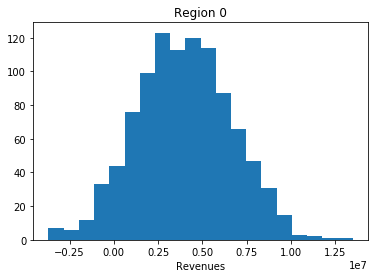

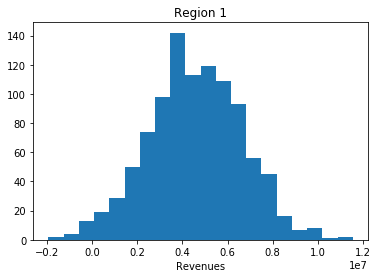

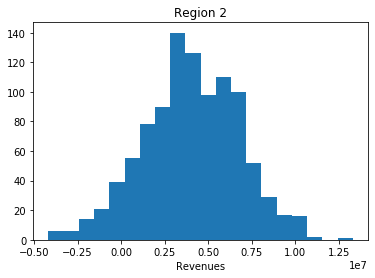

In [16]:
def rev_bootstr(target, predictions): #creates a function that takes target and prediction as arguments
    state = np.random.RandomState(12345) #sets a random state
    values = [] #empty list called values
    target = target.reset_index(drop=True)#resets the index of the target
    
    #bootstrapping
    for i in range(1000):#loop a 1000 times
        target_sample = target.sample(n=points, replace=True, random_state=state)
        #creates a sample of 500 target values, repetition allowed, with a changing random state
        pred_sample=predictions[target_sample.index]
        #prediction sample will simply be predictions associated with the target sample values
        values.append(revenue(target_sample, pred_sample, points_needed))
        #calculates the revenue using our revenue function for 200 wells
    return pd.Series(values) #returns the list as a series

revenues0 = rev_bootstr(t_valid0, pred0)#bootstrap for region 0
revenues1 = rev_bootstr(t_valid1, pred1)#bootstrap for region 1
revenues2 = rev_bootstr(t_valid2, pred2)#bootstrap for region 2

plots = [revenues0, revenues1, revenues2] #list of bootstrap variables
titles = ['Region 0', 'Region 1', 'Region 2'] #list of titles
for i in range(3):#loop from 0 to 2
    plt.hist(plots[i], bins=20)#plots a histogram with 20 bins
    plt.title(titles[i])#gives it the appropriate title
    plt.xlabel('Revenues')#labels the x-axis as 'Revenues'
    plt.show()#shows the plot

We can see that all regions are generally profitable even though some losses are observed. Now for each region, we can calculate the 95% confidence interval, the average mean, and the risk of loss as a percentage. We want the region to have a loss risk lower than 2.5%. Firstly, region 0:

In [20]:
conf_interval = [revenues0.quantile(0.025), revenues0.quantile(0.975)]
#calculates the 95% confidence interval by getting the required percentiles
loss_risk = len(revenues0[revenues0 < 0]) / len(revenues0)
#calculates the risk of loss by dividing the number of losses by the total number of values from the 
#bootstrap result
print('Region 0')
print('Average profit', revenues0.mean()) 
print('95% confidence interval:', conf_interval)
print('Risk of losses', loss_risk)

Region 0
Average profit 3961649.8480237112
95% confidence interval: [-1112155.4589049604, 9097669.415534232]
Risk of losses 0.069


For region 1:

In [22]:
conf_interval = [revenues1.quantile(0.025), revenues1.quantile(0.975)]
loss_risk = len(revenues1[revenues1 < 0]) / len(revenues1)
print('Region 1')
print('Average profit', revenues1.mean()) 
print('95% confidence interval:', conf_interval)
print('Risk of losses', loss_risk)

Region 1
Average profit 4560451.057866608
95% confidence interval: [338205.0939898603, 8522894.538660347]
Risk of losses 0.015


For region 2:

In [23]:
conf_interval = [revenues2.quantile(0.025), revenues2.quantile(0.975)]
loss_risk = len(revenues2[revenues2 < 0]) / len(revenues2)
print('Region 2')
print('Average profit', revenues2.mean()) 
print('95% confidence interval:', conf_interval)
print('Risk of losses', loss_risk)

Region 2
Average profit 4044038.6656835675
95% confidence interval: [-1633504.1339559837, 9503595.749237997]
Risk of losses 0.076


We can conclude that Region 1 is the best for oil development since it has the least risk of loss (1.5%), the greatest 95% confidence interval limits (Lower limit: 4431472.486639005 ; Upper limit: 4689429.62909421), and the greatest average profit of 4560451.057866608

## Conclusion <a name="step1"></a>
* We trained a Linear Regression models for the datasets from the 3 regions 
* We established that 111.11 units of volume are sufficient for a well to not incur any loss
* We bootstrapped the target values by creating samples of 500 values and used their corresponding prediction values to calculate profit values for their top 200 reserves
* Using the bootstraps, we calculated confidence intervals, average profit, and risk of loss. We concluded that  Region 1 is the best for oil development since it has the least risk of loss (1.5%), the greatest confidence interval limits (Lower limit: 4431472.486639005 ; Upper limit: 4689429.62909421), and the greatest average profit of 4560451.057866608 